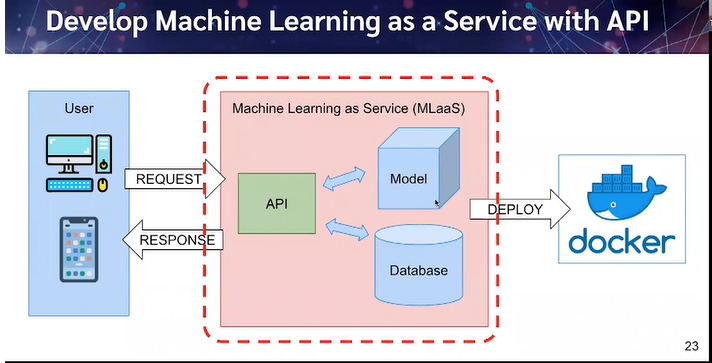

In [1]:
from flask import Flask, request
from flask_cors import CORS, cross_origin
import joblib
import numpy as np
#import re

app = Flask(__name__)
CORS(app)

@app.route('/')
def helloworld():
    return 'Helloworld'

@app.route('/iris', methods=['POST'])
@cross_origin()
def predict_species():
    model = joblib.load('iris.model')
    req = request.values['param']
    inputs = np.array(req.split(','), dtype=np.float32).reshape(1,-1)
    predict_target =model.predict(inputs)
    if predict_target == 0:
        return 'Setosa'
    elif predict_target == 1:
        return 'Versicolor'
    else:
        return 'Virginica'

if __name__=='__main__':
    app.run(host='0.0.0.0', port=5000, debug=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Nov/2021 14:15:59] "POST /iris HTTP/1.1" 200 -


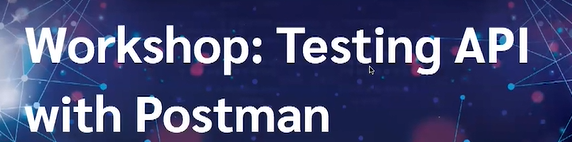

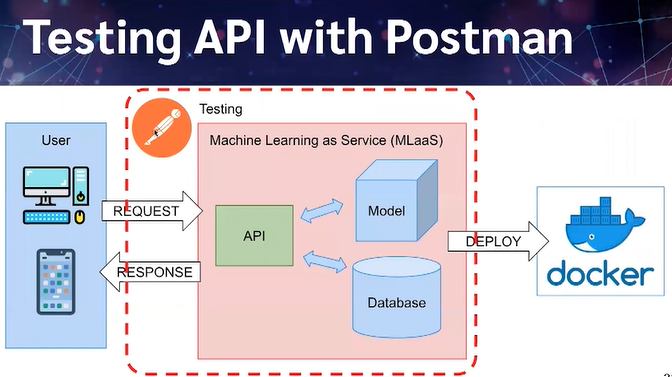